# **Лабораторная работа. Описательная статистика.**

**1)** Провести очистку, заполнение пропусков. Построить гистограммы,
интерпретировать результаты.

**2)** Сегментировать рынок на основе гистограмм. Вычислить описательные
статистики, сделать выводы.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avito_flats_inner_merged.csv', sep = '*', index_col = 0)
df

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание
0,97394,Санкт-Петербург,Заневский пр-т,59.93432;30.43234,6116946.0,студия,25.0,монолитный,2021-03-16,5.0,12.2,3 из 8,https://78.img.avito.st/image/1/fxS_pbay0_2JDB...,Беспроцентная рассрочка от застройщика! Не упу...
1,87459,Санкт-Петербург,ш. Петергофское,59.8612;30.15,9616960.0,2,58.0,монолитный,2021-03-24,11.0,27.0,10 из 10,https://79.img.avito.st/image/1/sogKqrayHmE8A9...,Уютная 2-комнатная квартира на 10 этаже. (9873)
2,94744,Санкт-Петербург,ул. Глухарская,60.03361;30.20926,3843000.0,студия,23.0,монолитный,2021-03-24,13.8,26.3,13 из 13,https://02.img.avito.st/image/1/N6ffnraym07pN1...,Студия 23 кв.м с чистовой отделкой на 13 этаже...
3,66432,Санкт-Петербург,ул. Сызранская,59.87787;30.33784,11689600.0,2,45.0,монолитный,2021-03-24,9.7,24.4,7 из 11,https://74.img.avito.st/image/1/b_UD2raywxw1cw...,Раннее субботнее утро. Вы спускаетесь в пекарн...
4,39694,Санкт-Петербург,пр-т Пискаревский,59.97113;30.41533,6840238.0,1,37.7,кирпичный,2021-03-24,13.8,37.7,13 из 17,https://75.img.avito.st/image/1/LuugULayggKW-U...,Продаётся однокомнатная квартира в жилом компл...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,11739,Санкт-Петербург,ул. Глухарская,60.03313;30.19623,6660000.0,1,42.5,монолитный,2021-04-11,11.5,15.0,4 из 13,https://81.img.avito.st/image/1/JPkRDbayiBAnpE...,Продается просторная 1к. квартира в новом доме...
6544,60544,Санкт-Петербург,ул. Студенческая,59.99514;30.3227,7170000.0,1,34.2,монолитный,2021-04-11,10.8,16.0,7 из 11,https://14.img.avito.st/image/1/WwFhO7ay9-hXkj...,Продается светлая 1к. квартира с белой отделко...
6545,93992,Санкт-Петербург,пос. Парголово,60.07097;30.26139,3720319.0,студия,29.2,кирпичный,2021-04-11,13.8,29.2,11 из 16,https://00.img.avito.st/image/1/5cR3wLaySS1BaY...,Продаётся квартира-студия в жилом комплексе Pa...
6546,68754,Санкт-Петербург,ул. Глухарская,60.0335;30.20474,16103000.0,3,83.6,монолитный,2021-04-11,21.3,35.9,8 из 12,https://31.img.avito.st/image/1/evE6FLay1hgMvR...,"О проекте. Жилой квартал Modum, который выведе..."


In [ ]:
# проверю, есть ли пропуски в данных

df.isna().sum()

id                   0
Город                0
Улица                4
Геометка_дома        0
Цена                 0
Количество_комнат    0
Общая_площадь        0
Материал_стен        0
Дата                 0
Площадь_кухни        0
Жилая_площадь        0
Этаж                 0
Фото                 0
Описание             0
dtype: int64

Есть 4 пропуска улиц. Посмотрим, где именно:

In [ ]:
df[df['Улица'].isnull()]

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание
130,32571,Санкт-Петербург,NaN,60.03901;30.21575,3650000.0,студия,25.7,кирпичный,2021-03-24,13.8,18.6,12 из 15,https://31.img.avito.st/image/1/GvIucbaythsY2H...,"Продается видовая квартира в ЖК ""Чистое небо"",..."
1137,9830,Санкт-Петербург,NaN,60.03901;30.21575,5500000.0,1,35.4,монолитный,2021-03-24,17.0,10.0,14 из 24,https://71.img.avito.st/image/1/GhNt8LaytvpbWX...,Удобная евро 2-х комнатная квартира. Жилой ком...
4829,93729,Санкт-Петербург,NaN,59.90603;30.44064,4280000.0,студия,25.6,монолитный,too old,5.0,26.3,8 из 15,https://09.img.avito.st/image/1/5KqCjbaySEO0JI...,Квартира с видом на Неву!Переуступка от собств...
5475,98474,Санкт-Петербург,NaN,59.8404;30.10495,5000000.0,1,34.1,монолитный,too old,10.2,17.0,8 из 8,https://82.img.avito.st/image/1/PzNNs7ayk9p7Gl...,Продается 1 комнатная квартира по переуступке ...


Так как в данных имеется информация с геометкой дома, можно найти дома, расположенные рядом, и заполнить названия улиц.

In [ ]:
# ищу пропущенную улицу для строк 130 и 1137

df.loc[df['Геометка_дома'] == '60.03901;30.21575'].head(1)

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание
50,77048,Санкт-Петербург,пр-т Комендантский/Арцеуловская ал.,60.03901;30.21575,8650156.0,2,63.6,кирпичный,2021-03-24,13.8,26.3,16 из 24,https://06.img.avito.st/image/1/G8jaObaytyHskH...,Продается двухкомнатная квартира в ЖК Чистое н...


In [ ]:
# заполню пропуски улицей с такими же геометками

df[130:131].fillna('пр-т Комендантский/Арцеуловская ал.', inplace=True)
df[1137:1138].fillna('пр-т Комендантский/Арцеуловская ал.', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
# ищу пропущенную улицу для строки 5475

df.loc[df['Геометка_дома'] == '59.8404;30.10495'].head(1)

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание
97,94031,Санкт-Петербург,пр-т Ветеранов/Будённого/ул. Генерала Кравченко,59.8404;30.10495,3300148.0,студия,24.5,кирпичный,2021-03-24,13.8,26.3,6 из 8,https://15.img.avito.st/image/1/Hjqjx7aystOVbn...,Продается студия в ЖК Солнечный город площадью...


In [ ]:
df[5475:5476].fillna('пр-т Ветеранов/Будённого/ул. Генерала Кравченко', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
# ищу пропущенную улицу для строки 4829

df.loc[df['Геометка_дома'] == '59.90603;30.44064'].head(1)

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание
4829,93729,Санкт-Петербург,NaN,59.90603;30.44064,4280000.0,студия,25.6,монолитный,too old,5.0,26.3,8 из 15,https://09.img.avito.st/image/1/5KqCjbaySEO0JI...,Квартира с видом на Неву!Переуступка от собств...


In [ ]:
# названия улицы с такой же геометкой нет
# удалю строку с пропуском

df = df.drop([4829])

In [ ]:
df.isna().sum()

id                   0
Город                0
Улица                0
Геометка_дома        0
Цена                 0
Количество_комнат    0
Общая_площадь        0
Материал_стен        0
Дата                 0
Площадь_кухни        0
Жилая_площадь        0
Этаж                 0
Фото                 0
Описание             0
dtype: int64

Теперь пропусеов нет. Посмотрим на типы данных в датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6547 entries, 0 to 6547
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6547 non-null   int64  
 1   Город              6547 non-null   object 
 2   Улица              6547 non-null   object 
 3   Геометка_дома      6547 non-null   object 
 4   Цена               6547 non-null   float64
 5   Количество_комнат  6547 non-null   object 
 6   Общая_площадь      6547 non-null   float64
 7   Материал_стен      6547 non-null   object 
 8   Дата               6547 non-null   object 
 9   Площадь_кухни      6547 non-null   float64
 10  Жилая_площадь      6547 non-null   float64
 11  Этаж               6547 non-null   object 
 12  Фото               6547 non-null   object 
 13  Описание           6547 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 767.2+ KB


In [ ]:
df['Этаж'].head()

0      3 из 8
1    10 из 10
2    13 из 13
3     7 из 11
4    13 из 17
Name: Этаж, dtype: object

Переменная 'Этаж' имеет категориальный тип, так как помимо номера этажа квартиры указано общее количество этажей в здании. Попробую разделить эти переменные на два столбца.

In [ ]:
df['Всего_этажей'] = pd.to_numeric(df['Этаж'].apply(lambda x: x.split()[2]))
df['Этаж'] = pd.to_numeric(df['Этаж'].apply(lambda x: x.split()[0]))
df.head()

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание,Всего_этажей
0,97394,Санкт-Петербург,Заневский пр-т,59.93432;30.43234,6116946.0,студия,25.0,монолитный,2021-03-16,5.0,12.2,3,https://78.img.avito.st/image/1/fxS_pbay0_2JDB...,Беспроцентная рассрочка от застройщика! Не упу...,8
1,87459,Санкт-Петербург,ш. Петергофское,59.8612;30.15,9616960.0,2,58.0,монолитный,2021-03-24,11.0,27.0,10,https://79.img.avito.st/image/1/sogKqrayHmE8A9...,Уютная 2-комнатная квартира на 10 этаже. (9873),10
2,94744,Санкт-Петербург,ул. Глухарская,60.03361;30.20926,3843000.0,студия,23.0,монолитный,2021-03-24,13.8,26.3,13,https://02.img.avito.st/image/1/N6ffnraym07pN1...,Студия 23 кв.м с чистовой отделкой на 13 этаже...,13
3,66432,Санкт-Петербург,ул. Сызранская,59.87787;30.33784,11689600.0,2,45.0,монолитный,2021-03-24,9.7,24.4,7,https://74.img.avito.st/image/1/b_UD2raywxw1cw...,Раннее субботнее утро. Вы спускаетесь в пекарн...,11
4,39694,Санкт-Петербург,пр-т Пискаревский,59.97113;30.41533,6840238.0,1,37.7,кирпичный,2021-03-24,13.8,37.7,13,https://75.img.avito.st/image/1/LuugULayggKW-U...,Продаётся однокомнатная квартира в жилом компл...,17


В переменной 'Количество_комнат' также есть категориальные типы данных, поэтому закодирую их.

In [ ]:
df['Количество_комнат'].value_counts()

1                   2138
2                   1488
студия              1446
3                   1103
4                    347
5                     21
6                      2
7                      1
своб. планировка       1
Name: Количество_комнат, dtype: int64

In [ ]:
# студии будет соответствовать 0, а свободной планировке 8

df.loc[df['Количество_комнат'] == 'студия', 'Количество_комнат'] = 0
df.loc[df['Количество_комнат'] == 'своб. планировка', 'Количество_комнат'] = 8

df['Количество_комнат'] = df['Количество_комнат'].astype(int)

df['Количество_комнат'].value_counts()

1    2138
2    1488
0    1446
3    1103
4     347
5      21
6       2
8       1
Name: Количество_комнат, dtype: int64

Проверю наличие выбросов в наиболее значимых переменных.

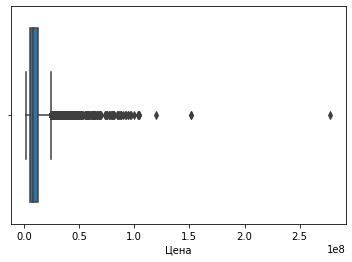

In [ ]:
sns.boxplot(x='Цена', data = df)

Есть квартира с относительно большой ценой. Посмотрим, что это за объявление.

In [ ]:
df[df['Цена'] == df['Цена'].max()]

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание,Всего_этажей
1623,61516,Санкт-Петербург,ул. Вязовая,59.96767;30.27575,277760000.0,7,396.8,монолитный,2021-03-24,31.1,26.3,8,https://25.img.avito.st/image/1/0Lg6DbayfFEMpL...,"Роскошный видовой пентхаус, площадью 397 квадр...",8


Это пентхаус с ценой 277 млн. руб. Для дальнейшего анализа наиболее типичных значений в выборке данное объявление будет сильно влиять, поэтому удалю его.

In [ ]:
df = df.drop([1623])

In [ ]:
df.shape

(6546, 15)

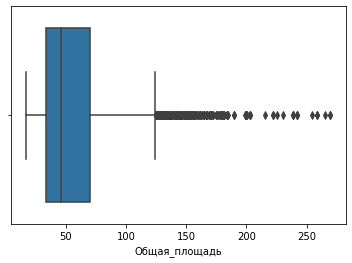

In [ ]:
sns.boxplot(x='Общая_площадь', data = df)

In [ ]:
# разделю числовые и категориальные переменные

num = ['Количество_комнат', 'Общая_площадь', 'Площадь_кухни', 'Жилая_площадь', 'Этаж', 'Всего_этажей']
cat = ['Город', 'Улица', 'Материал_стен']

Так как в данных представлены разные районы СПб и области (что видим чуть ниже), то стоит рассмотреть переменную 'Цены' отдельно.

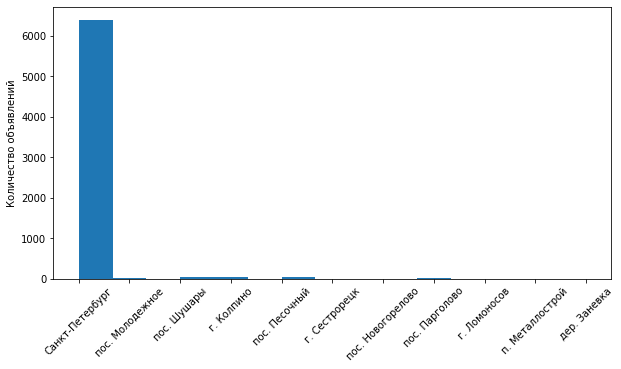

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(df['Город'], bins = 15)
plt.xticks(rotation = 45)
plt.ylabel('Количество объявлений')
plt.show()

Основное количество объявлений представлено о квартирах в Санкт-Петербурге.

In [ ]:
df['Улица'].value_counts()

дор. Муринская/Пискаревский пр-т    364
ул. Глухарская                      238
Невская губа                        183
Октябрьская наб.                    180
Заневский пр-т                      170
                                   ... 
тер. Пригородный                      1
ул. Вишерская                         1
Ириновский пр-т                       1
пр-т Ветеранов/Будённого              1
дор. Муринская                        1
Name: Улица, Length: 216, dtype: int64

Больше всего объявлений о продаже квартир на дор. Муринская/Пискаревский пр-т.

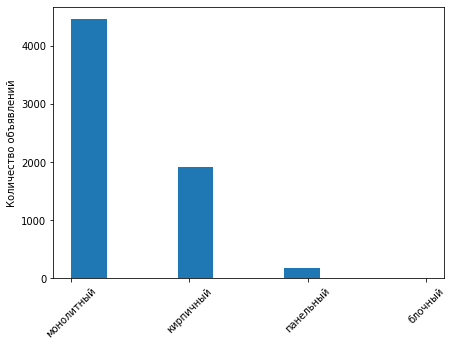

In [ ]:
plt.figure(figsize = (7, 5))
plt.hist(df['Материал_стен'], bins = 10)
plt.xticks(rotation = 45)
plt.ylabel('Количество объявлений')
plt.show()

Чаще всего продают квартиры в монолитных домах.

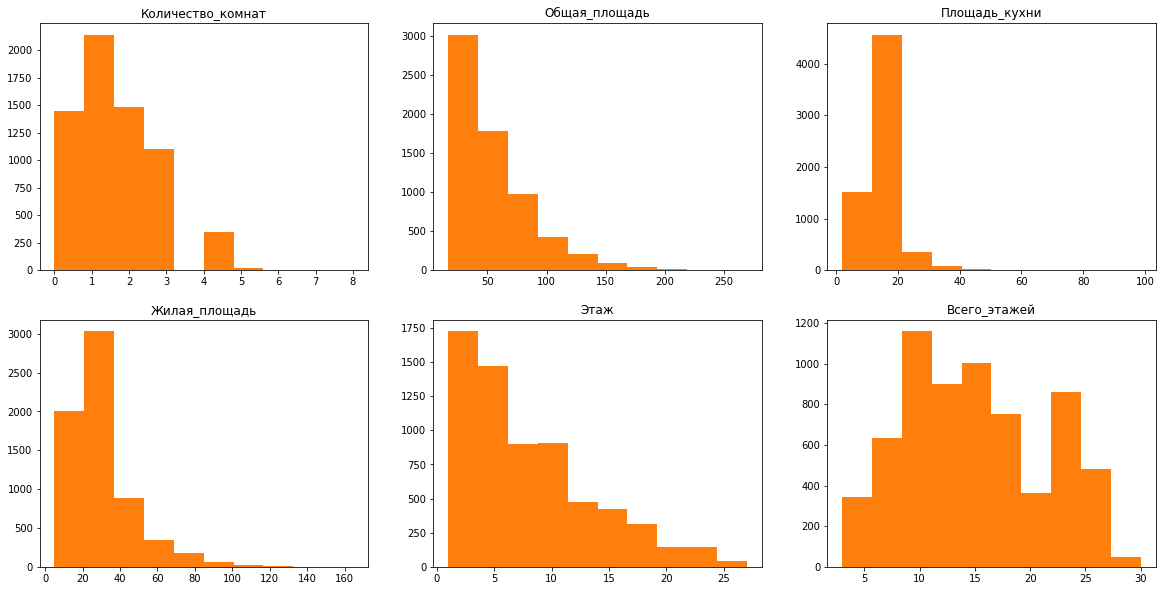

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))

ax = ax.ravel()

for i, column in enumerate(num):
  ax[i].set_title(column)
  ax[i].hist(df[column])
  ax[i].hist(df[column])
plt.show()

Больше 2000 объявлений о продаже однокомнатных квартир общей площадью до 40-45 кв. метров. В основном продают квартиры на первых этажах.

Почти все объявления о квартирах в Санкт-Петербурге, малая часть - это область. Имеет смысл разделить данные для анализа цен.

In [ ]:
city = df[df['Город'] == 'Санкт-Петербург']
region = df[df['Город'] != 'Санкт-Петербург']

In [ ]:
fig = make_subplots(rows=1, cols=2,  subplot_titles=('Цена квартир в СПб', 'Цена квартир в области'))

trace0 = go.Histogram(x = city['Цена'], nbinsx = 20, name = 'СПб')
trace1 = go.Histogram(x = region['Цена'], nbinsx = 20, name = 'Область')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.show()

По гистограмме с ценой в области видно, что присутствуют квартиры с ценой более 33 млн. руб. Видимо, это загородные дома. Посмотрим, где они находятся.

In [ ]:
region.loc[(region['Цена'] >= 20e+6)]

,id,Город,Улица,Геометка_дома,Цена,Количество_комнат,Общая_площадь,Материал_стен,Дата,Площадь_кухни,Жилая_площадь,Этаж,Фото,Описание,Всего_этажей
793,49453,г. Сестрорецк,ул. Максима Горького,60.11529;29.95439,33068000.0,3,118.4,монолитный,2021-03-24,50.0,45.9,2,https://93.img.avito.st/image/1/eDKFlbay1NuzPB...,Продаётся лаунж-студия в новом доме жилого ком...,5
1879,75470,г. Сестрорецк,ул. Максима Горького,60.11529;29.95439,33068000.0,4,118.4,монолитный,2021-03-24,49.0,45.7,2,https://58.img.avito.st/image/1/7wV_kLayQ-xJOY...,!!Индивидуальное согласование условий и скидок...,5


Это квартиры в г. Сестрорецк. Возможно, это дубликаты объявлений. Также удалю их для дальнейшего анализа и интерпретации результатов.

In [ ]:
region = region.drop([793])
region = region.drop([1879])

Теперь посмотрим описательные статистики.

In [ ]:
city.describe()

,id,Цена,Общая_площадь,Площадь_кухни,Жилая_площадь,Этаж,Всего_этажей
count,6401.000000,6.401000e+03,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,50645.647086,1.150276e+07,55.835744,14.167271,29.466380,8.004531,15.236994
std,28853.123315,1.117654e+07,32.754975,6.487641,17.126767,5.634975,6.130629
min,3.000000,2.390000e+06,16.900000,2.000000,5.000000,1.000000,3.000000
25%,26115.000000,5.478002e+06,33.200000,12.200000,17.400000,3.000000,10.000000
50%,51137.000000,8.100307e+06,45.500000,13.800000,26.300000,7.000000,14.000000
75%,75257.000000,1.313131e+07,69.200000,15.300000,34.600000,11.000000,20.000000
max,99997.000000,1.515152e+08,269.600000,98.600000,164.400000,27.000000,30.000000


In [ ]:
region.describe()

,id,Цена,Общая_площадь,Площадь_кухни,Жилая_площадь,Этаж,Всего_этажей
count,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,50130.188811,7.049556e+06,56.220280,13.651748,26.209091,4.832168,9.447552
std,28397.727190,2.533469e+06,22.596203,4.378884,11.997916,3.851076,4.615770
min,290.000000,1.800000e+06,20.700000,4.200000,10.200000,1.000000,4.000000
25%,25684.000000,5.076763e+06,37.050000,11.450000,15.350000,2.000000,8.000000
50%,44920.000000,6.632650e+06,53.100000,13.800000,26.300000,4.000000,9.000000
75%,77073.000000,8.865946e+06,72.600000,15.000000,31.800000,7.000000,10.000000
max,98846.000000,1.366575e+07,110.700000,34.200000,66.100000,20.000000,26.000000


**Выводы:**

1) Большая часть объявлений представлена о продаже однокомнатных квартир в монолитных домах в Санкт-Петербурге. Средняя цена по городу составляет 11.5 млн. руб., медианная - 8 млн. руб. Также есть информация о продаже пентхауса на ул. Вязова.

2) Средняя цена квартир в области составляет порядка 7 млн. руб. В Сестрорецке продаются квартиры стоимостью 33 млн. руб.

3) В основном продают квартиры общей площадью 56 кв. м.